<a href="https://colab.research.google.com/github/Barasinghaa/Deep_learning/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 14s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/15147473067_7c5498eb0e_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/5637140035_e6c5514f54.jpg'),
 PosixPath('datasets/flower_photos/tulips/15275199229_962387f24d.jpg'),
 PosixPath('datasets/flower_photos/tulips/212720516_df4965ebda_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/155097272_70feb13184.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4242976586_607a8f9843_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2536282942_b5ca27577e.jpg'),
 PosixPath('datasets/flower_photos/roses/9164900485_605aa12da8.jpg'),
 PosixPath('datasets/flower_photos/roses/3554620445_082dd0bec4_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3664842094_5fd60ee26b.jpg')]

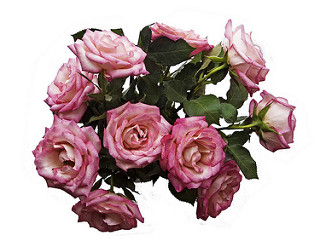

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4242976586_607a8f9843_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(241, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),      #16 filters and kernel size is (3,3)
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 14s 20ms/step - loss: 1.2326 - accuracy: 0.4956
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9806 - accuracy: 0.6170
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7600 - accuracy: 0.7097
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5411 - accuracy: 0.8056
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.3291 - accuracy: 0.8877
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.1640 - accuracy: 0.9480
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0958 - accuracy: 0.9709
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0617 - accuracy: 0.9826
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0250 - accuracy: 0.9956
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0290 - accuracy: 0.9916
Epoch 11

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 2.3952 - accuracy: 0.6732


[2.395202398300171, 0.673202633857727]

As we can see the accuracy is pathetic

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 10ms/step


array([[ -7.372907  ,  -6.9049406 ,   8.630421  ,  14.576497  ,
          1.1558443 ],
       [ 18.640055  , -10.161855  , -17.998446  ,   3.2546418 ,
         19.624626  ],
       [  4.6910753 ,  10.586689  ,   4.7489285 ,  -0.9675781 ,
          7.7592006 ],
       ...,
       [  6.2894545 ,  -7.43566   ,   3.9752254 ,   9.88343   ,
         -2.3932526 ],
       [ 19.603006  ,   4.752044  , -12.484244  , -10.832702  ,
         19.659168  ],
       [  3.5073936 ,  -0.09080195,  -0.40135595,   3.316624  ,
         17.423603  ]], dtype=float32)

In [ ]:
#This converts it into a set of probablities
score = tf.nn.softmax(predictions[0])
np.argmax(score)

3

In [ ]:
y_test[0]

1

Data Augmentation is basically changing data to reduce overfitting and increase diversity , like we will rotate ,scale etc our images and then train our model

In [ ]:
data_aug=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3)
])

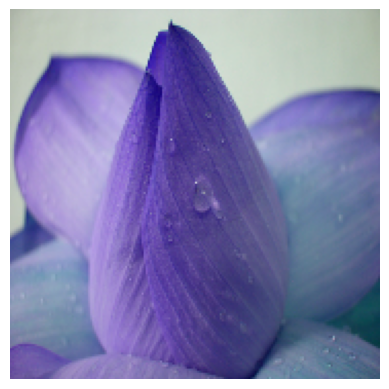

In [ ]:
plt.axis('off')
plt.imshow(X[1])

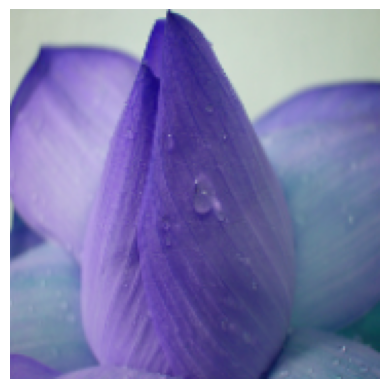

In [ ]:
plt.axis('off')
plt.imshow(data_aug(X)[1].numpy().astype("uint8"))

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

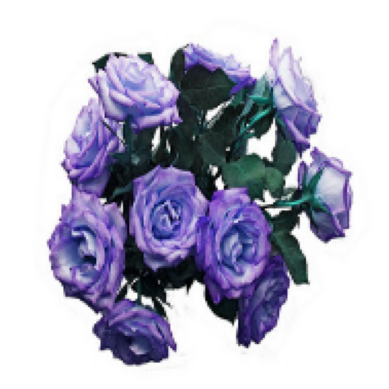

In [ ]:
plt.axis('off')
plt.imshow(X[0])

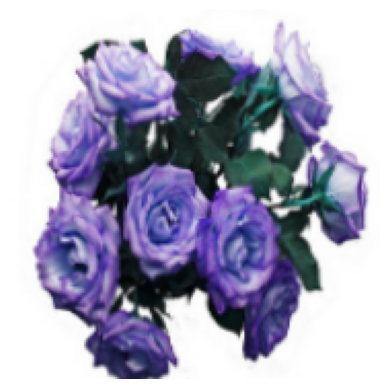

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 31ms/step - loss: 1.4151 - accuracy: 0.4146
Epoch 2/30
86/86 [==============================] - 2s 27ms/step - loss: 1.0811 - accuracy: 0.5716
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9943 - accuracy: 0.6086
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9240 - accuracy: 0.6392
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8758 - accuracy: 0.6642
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.8028 - accuracy: 0.6900
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7740 - accuracy: 0.6988
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7236 - accuracy: 0.7231
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6999 - accuracy: 0.7355
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6764 - accuracy: 0.7347
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 0.9671 - accuracy: 0.7244


[0.9670707583427429, 0.7244008779525757]